BAGGIN


Acuracia obtida com os dados de treinamento:  1.0

Acuracia obtida com os dados de teste:  0.8222222222222222


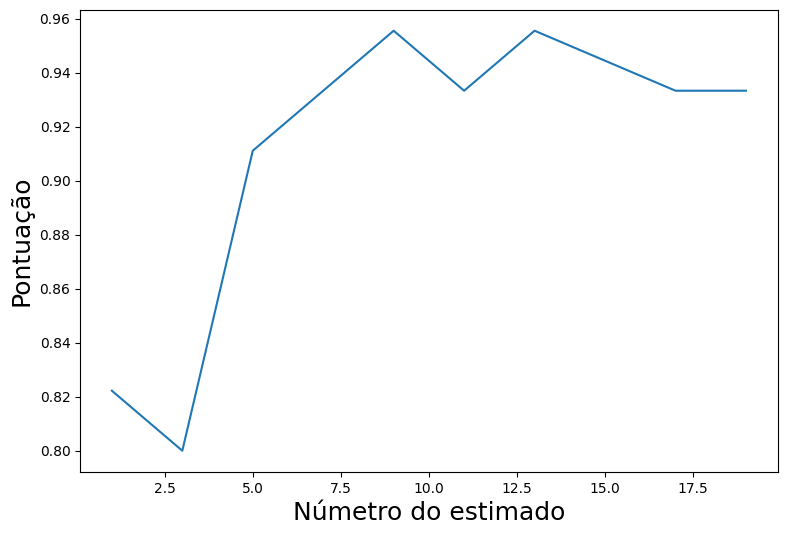

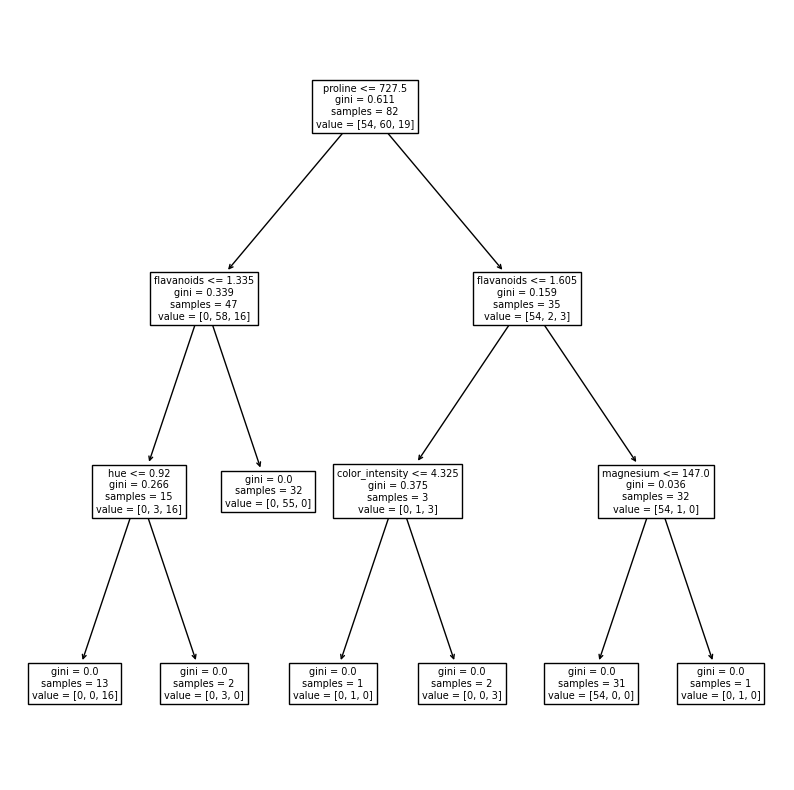

In [7]:
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dados = datasets.load_wine(as_frame = True)

X = dados.data
y = dados.target

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y , test_size=0.25, random_state=22)
dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_treino, y_treino)

y_predito = dtree.predict(X_teste)

print("\nAcuracia obtida com os dados de treinamento: ", accuracy_score(y_true=y_treino, y_pred=dtree.predict(X_treino)))
print("\nAcuracia obtida com os dados de teste: ", accuracy_score(y_true=y_teste, y_pred=y_predito))

#Classificador BAGGIN

from sklearn.ensemble import BaggingClassifier
intervalo_estimador = [1,3,5,7,9,11,13,17,19]


modelos = []
pontos = []

for n_estimators in intervalo_estimador:
    clf = BaggingClassifier(n_estimators=n_estimators, random_state=22)
    clf.fit(X_treino, y_treino)
    modelos.append(clf)
    pontos.append(accuracy_score(y_true=y_teste, y_pred = clf.predict(X_teste)))

plt.figure(figsize=(9,6))
plt.plot(intervalo_estimador, pontos)
plt.xlabel("Númetro do estimado", fontsize = 18)
plt.ylabel("Pontuação", fontsize = 18)
plt.show()

clf = BaggingClassifier(n_estimators=13, random_state=22)
clf.fit(X_treino, y_treino)
plt.figure(figsize=(10,10))
plot_tree(clf.estimators_[0], feature_names = X.columns)
plt.show()


Acuracia: 0.95
Matriz de cconfusão
[[  0  50]
 [  0 950]]
Acuracia para a classe A: 0.0
Acuracia para a classe B: 1.0


Acuracia: 0.716
Matriz de cconfusão
[[ 33  17]
 [267 683]]
Acuracia para a classe A: 0.66
Acuracia para a classe B: 0.7189473684210527
Valro AUC pra o modelo 1: 0.5


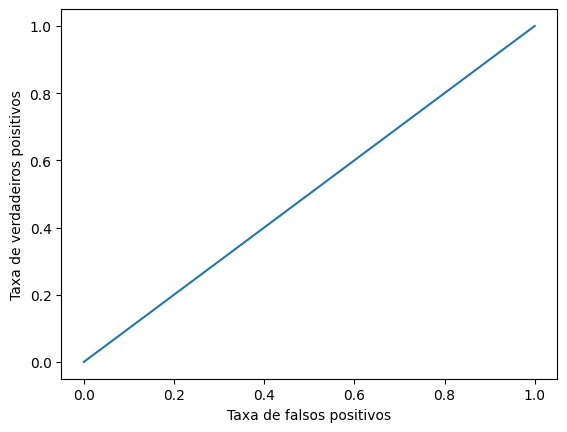

Valro AUC pra o modelo 2: 0.8106105263157894


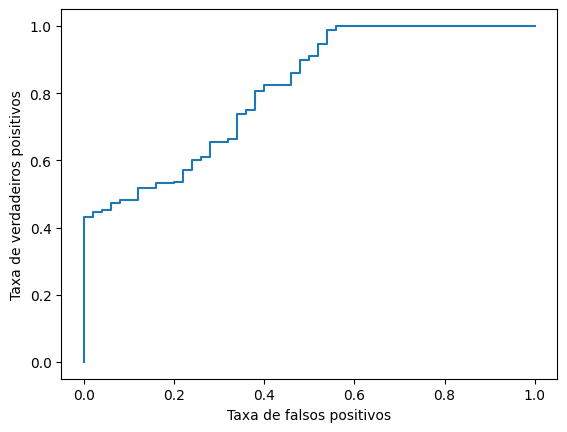

In [8]:
from cv2 import threshold
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n = 1000
razao = .95
n_A = int((1-razao)*n)
n_B = int(razao * n)

y = np.array([0] * n_A + [1] * n_B)

y_proba_1 = np.array([1]*n)
y_pred_1 = y_proba_1 > .5

print(f'Acuracia: {accuracy_score(y,y_pred_1)}')
cf_mat = confusion_matrix(y,y_pred_1)
print("Matriz de cconfusão")
print(cf_mat)
print(f'Acuracia para a classe A: {cf_mat[0][0]/n_A}')
print(f'Acuracia para a classe B: {cf_mat[1][1]/n_B}')

y_proba_2 = np.array(
    np.random.uniform(0,.7,n_A).tolist() + 
    np.random.uniform(.3,1,n_B).tolist()
)

y_pred_2 = y_proba_2 > .5


print(f'\n\nAcuracia: {accuracy_score(y,y_pred_2)}')
cf_mat = confusion_matrix(y,y_pred_2)
print("Matriz de cconfusão")
print(cf_mat)
print(f'Acuracia para a classe A: {cf_mat[0][0]/n_A}')
print(f'Acuracia para a classe B: {cf_mat[1][1]/n_B}')


def plota_Curva_ROC(y_verdadeiro, y_prob):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_verdadeiro, y_prob)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel("Taxa de falsos positivos")
    plt.ylabel("Taxa de verdadeiros poisitivos")
    plt.show()

print(f"Valor AUC pra o modelo 1: {roc_auc_score(y, y_proba_1)}")
plota_Curva_ROC(y, y_proba_1)

print(f"Valor AUC pra o modelo 2: {roc_auc_score(y, y_proba_2)}")
plota_Curva_ROC(y, y_proba_2)

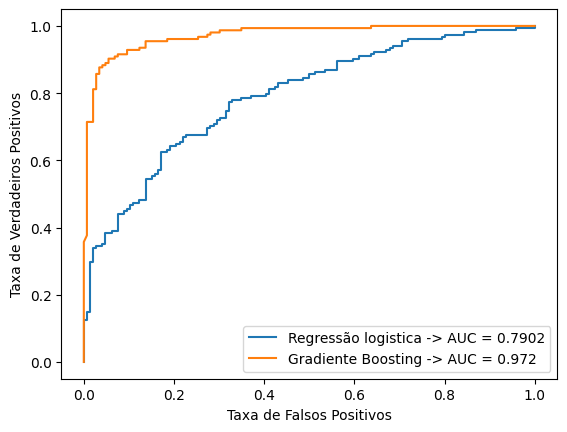

In [12]:
# Importando as bibliotecas

from cv2 import threshold
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

X, y = datasets.make_classification(
n_samples = 1000,
n_features = 4,
n_informative = 3,
n_redundant = 1,
random_state = 0
)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = .3, random_state = 0)

modelo_Reg_Log = LogisticRegression()
modelo_Reg_Log.fit(X_treino, y_treino)
y_predito = modelo_Reg_Log.predict_proba(X_teste)[:,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_teste, y_predito)
auc = round(metrics.roc_auc_score(y_teste, y_predito), 4)
plt.plot(false_positive_rate, true_positive_rate, label = "Regressão logistica -> AUC = " + str(auc))

modelo_Reg_Log = GradientBoostingClassifier()
modelo_Reg_Log.fit(X_treino, y_treino)
y_predito = modelo_Reg_Log.predict_proba(X_teste)[:,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_teste, y_predito)
auc = round(metrics.roc_auc_score(y_teste, y_predito), 4)
plt.plot(false_positive_rate, true_positive_rate, label = "Gradiente Boosting -> AUC = " + str(auc))

plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.show()






KNN

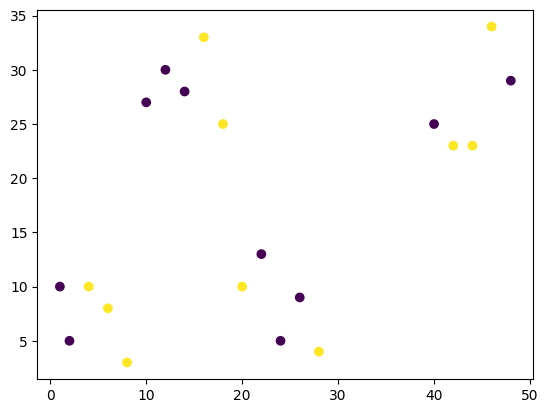

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


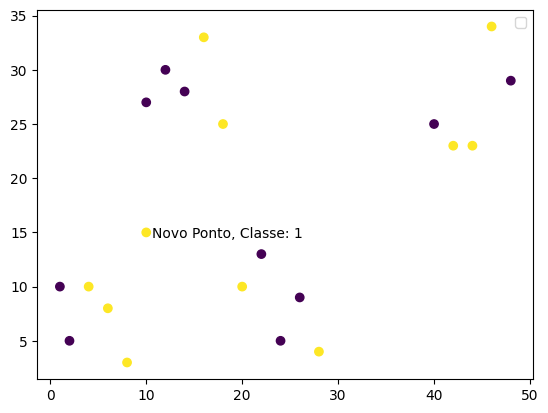

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


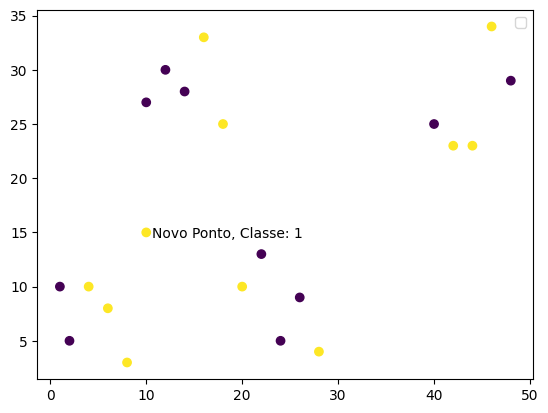

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


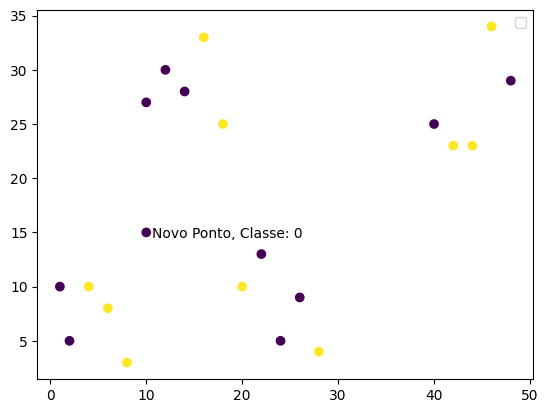

In [21]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,40,42,44,46,48]
y = [10,5,10,8,3,27,30,28,33,25,10,13,5,9,4,25,23,23,34,29]

classes = [0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0]

plt.scatter(x,y,c=classes)
plt.show()

dados = list(zip(x,y))

def Preditor_KNN(K):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(dados, classes)
    novo_x = 10
    novo_y = 15
    novo_ponto = [(novo_x, novo_y)]

    predicao = knn.predict(novo_ponto)

    plt.scatter(x + [novo_x], y + [novo_y], c = classes + [predicao[0]])

    plt.text(x = novo_x +0.6, y = novo_y -0.5, s = f"Novo Ponto, Classe: {predicao[0]}")
    plt.legend()
    plt.show()

Preditor_KNN(K = 1)
Preditor_KNN(K = 5)
Preditor_KNN(K = 15)

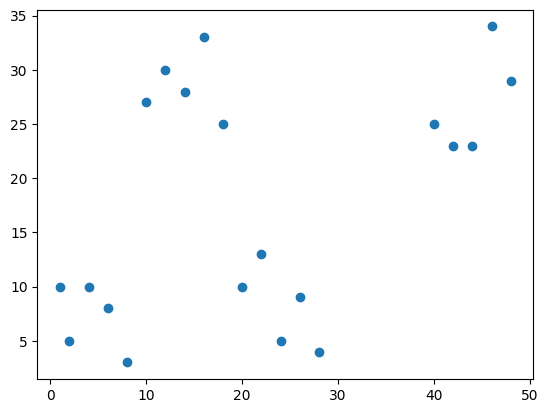

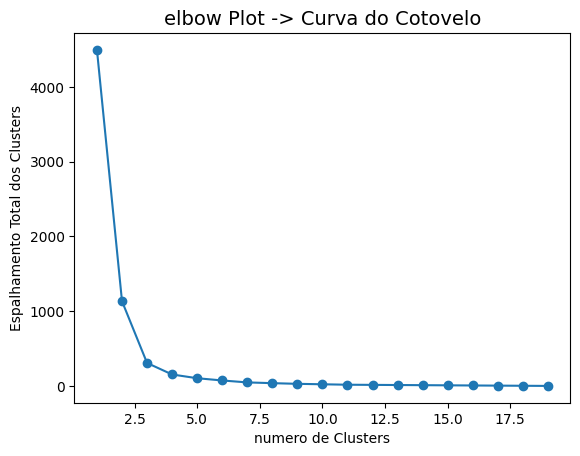

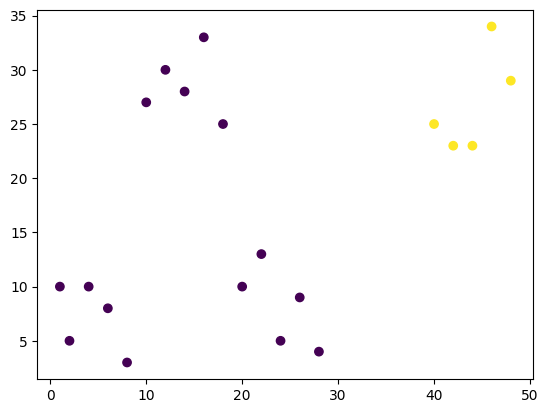

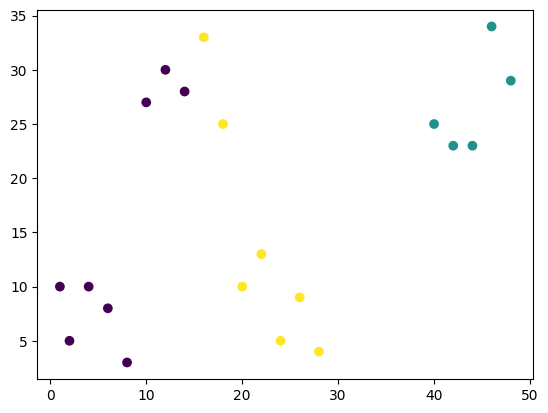

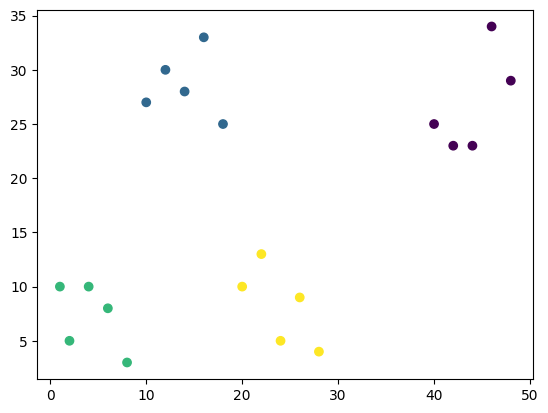

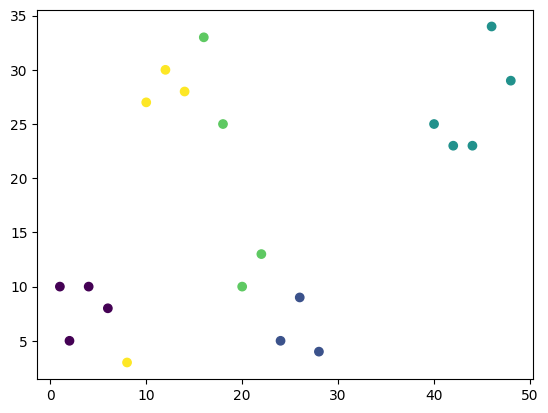

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,40,42,44,46,48]
y = [10,5,10,8,3,27,30,28,33,25,10,13,5,9,4,25,23,23,34,29]

plt.scatter(x,y)
plt.show()
data = pd.DataFrame(x,y)

espalhamento_clusters = []

for i in range(1, len(data)):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    espalhamento_clusters.append(round(kmeans.inertia_))

plt.plot(range(1, len(data)), espalhamento_clusters, marker = 'o')
plt.title("elbow Plot -> Curva do Cotovelo", fontsize=14)
plt.xlabel("numero de Clusters")
plt.ylabel("Espalhamento Total dos Clusters")
plt.show()

def Plota_Clusters(K):
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(data)
    plt.scatter(x,y,c=kmeans.labels_)
    plt.show()

Plota_Clusters(K = 2)
Plota_Clusters(K = 3)
Plota_Clusters(K = 4)
Plota_Clusters(K = 5)